This notebook renders the policy assessment cards. It must be run after [systematic_policy_assessment](systematic_policy_assessment.ipynb).

In [103]:
%reset-f
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from render_pol_assess import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline


# Data

In [105]:
xl = pd.ExcelFile("results/derivatives.xlsx")

ders=dict()
for s in xl.sheet_names:
    ders[s]=pd.read_excel("results/derivatives.xlsx", index_col="province", sheetname=s)
ders=pd.concat(ders, names=["out","var"],axis=1).stack("var")
ders.head()

out                         dKtot  dWtot_currency
province var                                     
Abra     fap         2.276709e+05  1052089.708077
         far         9.193919e+05   761511.025421
         nat_buyout -5.820766e-07  -446649.700235
         pi         -2.124495e+05  -368933.100200
         pov_head    5.528015e+04   283270.927011

# Parameters

In [106]:
#Policy Labels (x axis)
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)
policy_descriptions = policy_info.descriptor.copy()
policy_descriptions.head()

key
avg_prod_k                           Productivity of capital
axfin_p                    Access to finance for poor people
axfin_r                Access to finance for non-poor people
axhealth                               Access to health care
fap           Reduce exposure of poor households by {dh:.0%}
Name: descriptor, dtype: object

In [107]:
size = policy_info.increment
size.head()

key
avg_prod_k    0.01
axfin_p       0.01
axfin_r       0.01
axhealth      0.01
fap           0.01
Name: increment, dtype: float64

In [108]:
#formats policy description so as to show the particular amount of change
for k in policy_descriptions.index:
    try:
        policy_descriptions[k]=policy_descriptions[k].format(dh=size[k])
    except(TypeError):
        pass

policy_descriptions.head()    

key
avg_prod_k                     Productivity of capital
axfin_p              Access to finance for poor people
axfin_r          Access to finance for non-poor people
axhealth                         Access to health care
fap           Reduce exposure of poor households by 1%
Name: descriptor, dtype: object

In [109]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-3, string = "million pesos")

In [110]:
#Load the excel data file into a dataframe (table)
# df=pd.read_excel("inputs/all_data_compiled.xlsx", index_col=0, skiprows=[0, 2]  ) 

# base=pd.DataFrame([policy_info.concerns]*df.shape[0], index=df.index )
# for c in base:
#     base[c].replace("p",df.pov_head, inplace=True)
#     base[c].replace("all",1, inplace=True)
#     base[c].replace("r",1-df.pov_head, inplace=True)
# base.head()


In [111]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


# actual drawing

Currently working on:  Maguindanao


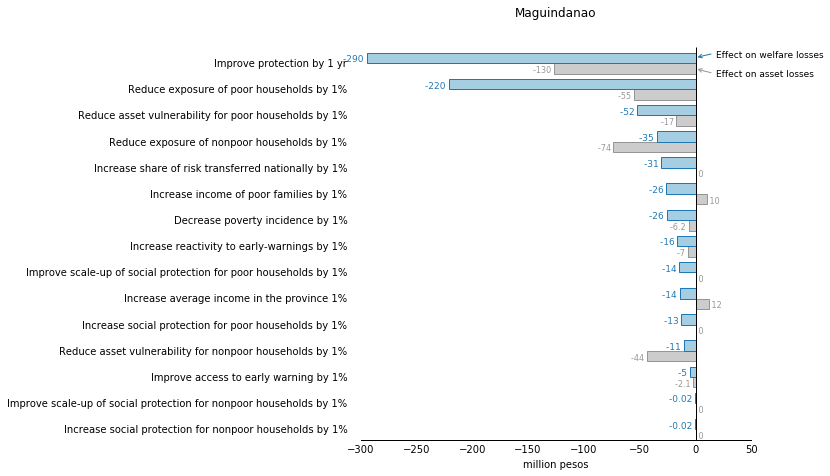

In [112]:
render_pol_cards(ders,colors,policy_descriptions,unit,size,["Maguindanao", "Bulacan"])
# render_pol_cards(ders,colors,policy_descriptions,unit,size)

### Merge to single pdf

In [113]:
province_list=ders.unstack("var").index.tolist()
merge_cardfiles(province_list,"../all_cards.pdf")

Merging cards....
Merging cards done
